In [1]:
import requests
import pandas as pd

In [2]:
def get_stock_data(stock_symbol, start_date, end_date):
    base_url = 'https://api.tiingo.com/tiingo/daily/'+stock_symbol+'/prices'
    token = '972532e23e050d46439b55da4037be82a728fc15'
    payload = {
        'token': token,
        'startDate': start_date,
        'endDate': end_date
    }
    response = requests.get(base_url, params = payload)
    return response

In [3]:
response = get_stock_data('MSFT','2020-3-1','2020-5-22')
print(response.url)
print(response.json())

https://api.tiingo.com/tiingo/daily/MSFT/prices?token=972532e23e050d46439b55da4037be82a728fc15&startDate=2020-3-1&endDate=2020-5-22
[{'date': '2020-03-02T00:00:00.000Z', 'close': 172.79, 'high': 172.92, 'low': 162.31, 'open': 165.31, 'volume': 71030810, 'adjClose': 172.3166535962, 'adjHigh': 172.4462974701, 'adjLow': 161.8653628404, 'adjOpen': 164.8571445453, 'adjVolume': 71030810, 'divCash': 0.0, 'splitFactor': 1.0}, {'date': '2020-03-03T00:00:00.000Z', 'close': 164.51, 'high': 175.0, 'low': 162.26, 'open': 173.8, 'volume': 71677019, 'adjClose': 164.0593360907, 'adjHigh': 174.5205994521, 'adjLow': 161.815499812, 'adjOpen': 173.3238867702, 'adjVolume': 71677019, 'divCash': 0.0, 'splitFactor': 1.0}, {'date': '2020-03-04T00:00:00.000Z', 'close': 170.55, 'high': 170.7, 'low': 165.62, 'open': 168.485, 'volume': 49814383, 'adjClose': 170.0827899232, 'adjHigh': 170.2323790084, 'adjLow': 165.1662953215, 'adjOpen': 168.0234468497, 'adjVolume': 49814383, 'divCash': 0.0, 'splitFactor': 1.0}, {'d

In [4]:
#json conversion
def parse_data(data_response):
    json_response = data_response.json()
    dates = []
    closes =[]
    opens = []
    highs = []
    lows = []
    vols = []
    for json_obj in json_response:
        dates.append(json_obj['date'])
        closes.append(json_obj['close'])
        opens.append(json_obj['open'])
        highs.append(json_obj['high'])
        lows.append(json_obj['low'])
        vols.append(json_obj['volume'])
    return dates, closes, opens, highs, lows, vols

In [5]:
dates, closes, opens, highs, lows, vols = parse_data(response)
print(dates)

['2020-03-02T00:00:00.000Z', '2020-03-03T00:00:00.000Z', '2020-03-04T00:00:00.000Z', '2020-03-05T00:00:00.000Z', '2020-03-06T00:00:00.000Z', '2020-03-09T00:00:00.000Z', '2020-03-10T00:00:00.000Z', '2020-03-11T00:00:00.000Z', '2020-03-12T00:00:00.000Z', '2020-03-13T00:00:00.000Z', '2020-03-16T00:00:00.000Z', '2020-03-17T00:00:00.000Z', '2020-03-18T00:00:00.000Z', '2020-03-19T00:00:00.000Z', '2020-03-20T00:00:00.000Z', '2020-03-23T00:00:00.000Z', '2020-03-24T00:00:00.000Z', '2020-03-25T00:00:00.000Z', '2020-03-26T00:00:00.000Z', '2020-03-27T00:00:00.000Z', '2020-03-30T00:00:00.000Z', '2020-03-31T00:00:00.000Z', '2020-04-01T00:00:00.000Z', '2020-04-02T00:00:00.000Z', '2020-04-03T00:00:00.000Z', '2020-04-06T00:00:00.000Z', '2020-04-07T00:00:00.000Z', '2020-04-08T00:00:00.000Z', '2020-04-09T00:00:00.000Z', '2020-04-13T00:00:00.000Z', '2020-04-14T00:00:00.000Z', '2020-04-15T00:00:00.000Z', '2020-04-16T00:00:00.000Z', '2020-04-17T00:00:00.000Z', '2020-04-20T00:00:00.000Z', '2020-04-21T00:00:0

In [6]:
#import matplotlib.pyplot as plt

In [7]:
#plt.plot(dates,lows)
#plt.title('Highs and Lows of MSFT')
#plt.xlabel('Dates')
#plt.ylabel('Price')
#plt.xticks(pd.date_range('2012-3-25','2020-5-14',5).strftime('%Y-%m-%d'))
#plt.legend(['Highs','Lows'])
#plt.show()

In [8]:
def calculate_price_difference(opens, closes):
    price_differences = []
    for i in range(len(opens) - 1):
        if opens[i + 1] >= closes[i]:
            price_differences.append([1, 0])
        else:
            price_differences.append([0, 1])
    return price_differences

In [9]:
price_differences = calculate_price_difference(opens, closes)
diff = []
for d in price_differences:
    diff.append(d[0])

In [10]:
import matplotlib.pyplot as plt

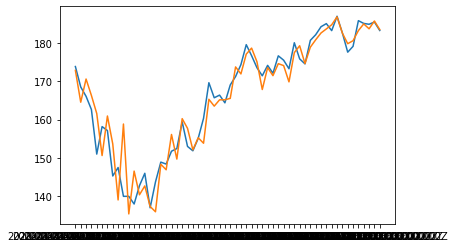

In [11]:
plt.plot(dates[1:], opens[1:])
plt.plot(dates[1:], closes[:-1])
plt.show()

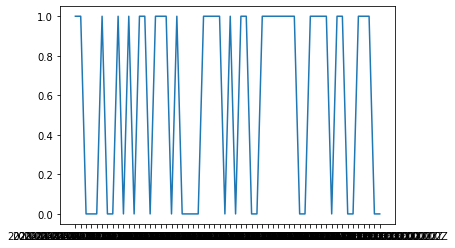

In [12]:
plt.plot(dates[1:], diff)
plt.show()

In [13]:
def create_datasets(stock_symbol, start_date, end_date):
    response = get_stock_data(stock_symbol, start_date, end_date)
    dates, closes, opens, highs, lows, vols = parse_data(response)
    
    labels = calculate_price_difference(opens, closes)
    
    inputs = []
    for i in range(len(labels)):
        inputs.append([closes[i], opens[i], highs[i], lows[i], vols[i]/1000])
    
    return inputs, labels

In [14]:
x_train, y_train = create_datasets('TSLA','2019-4-22','2020-4-21')
x_test, y_test = create_datasets('TSLA','2020-4-22','2020-5-23')

In [15]:
#y = Wx + b
import tensorflow as tf

D:\New folder\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\New folder\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\New folder\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\New folder\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type

In [16]:
x_input = tf.placeholder(dtype=tf.float32,shape=[None,5])
y_input = tf.placeholder(dtype=tf.float32,shape=[None,2])
W = tf.Variable(initial_value=tf.ones(shape=[5,2]))
b = tf.Variable(initial_value=tf.ones(shape=[2]))
y_output = tf.add(tf.matmul(x_input, W),b)


In [17]:
loss = tf.reduce_sum(tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits_v2(
    labels=y_input, logits=y_output)))
optimizer = tf.train.GradientDescentOptimizer(0.01)
train_step = optimizer.minimize(loss)

In [18]:
def measure_accuracy(actual, expected):
    num_correct = 0
    for i in range(len(actual)):
        actual_value = actual[i]
        expected_value = expected[i]
        if actual_value[0] >= actual_value[1] and expected_value[0] >= expected_value[1]:
            num_correct += 1
        elif actual_value[0] <= actual_value[1] and expected_value[0] <= expected_value[1]:
            num_correct += 1
    return (num_correct / len(actual)) * 100

In [19]:
session = tf.Session()
session.run(tf.global_variables_initializer())

In [20]:
for _ in range(20000):
    session.run(train_step, feed_dict={x_input: x_train, y_input: y_train})
print(measure_accuracy(session.run(
    y_output, feed_dict={x_input: x_test}), y_test))

59.09090909090909


In [21]:
print(session.run(
    y_output,feed_dict={x_input:x_test}), y_test)

[[ 460398.6  -426228.78]
 [ 430571.94 -398355.25]
 [ 434160.62 -401953.12]
 [ 637462.56 -589955.1 ]
 [ 488807.47 -452108.  ]
 [ 521672.16 -482883.44]
 [ 829697.8  -766210.1 ]
 [ 926938.4  -856047.2 ]
 [ 595155.4  -550834.06]
 [ 535747.06 -495522.8 ]
 [ 386241.1  -357772.2 ]
 [ 397237.1  -367927.25]
 [ 521662.   -482950.78]
 [ 530775.75 -491312.25]
 [ 513409.53 -475017.66]
 [ 589873.75 -545337.8 ]
 [ 455284.2  -421615.9 ]
 [ 373635.6  -346234.06]
 [ 404292.47 -374333.75]
 [ 351364.03 -325585.9 ]
 [ 291895.5  -270726.9 ]
 [ 419031.   -388119.25]] [[0, 1], [1, 0], [1, 0], [0, 1], [1, 0], [1, 0], [0, 1], [0, 1], [1, 0], [1, 0], [0, 1], [1, 0], [0, 1], [1, 0], [1, 0], [0, 1], [0, 1], [1, 0], [1, 0], [1, 0], [1, 0], [0, 1]]
